In [1]:
# This model is using Linear Regression to predict house price based on the accessibility to the nearest MRT station.

#installing python libraries.

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\rehnu'

In [3]:
cd C:\Users\rehnu\OneDrive\Desktop\Python!\Datasets for Kaggle Projects

C:\Users\rehnu\OneDrive\Desktop\Python!\Datasets for Kaggle Projects


In [4]:
Housing_data = pd.read_excel("Real_estate_valuation_data set.xlsx")

In [5]:
#Showing first few rows of data.
Housing_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
#showing last few rows of data.
Housing_data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [7]:
#Checking any null values.
Housing_data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [8]:
#Showing data types of all columns.
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [9]:
#Showing the total number of rows and columns in the dataset.
Housing_data.shape

(414, 8)

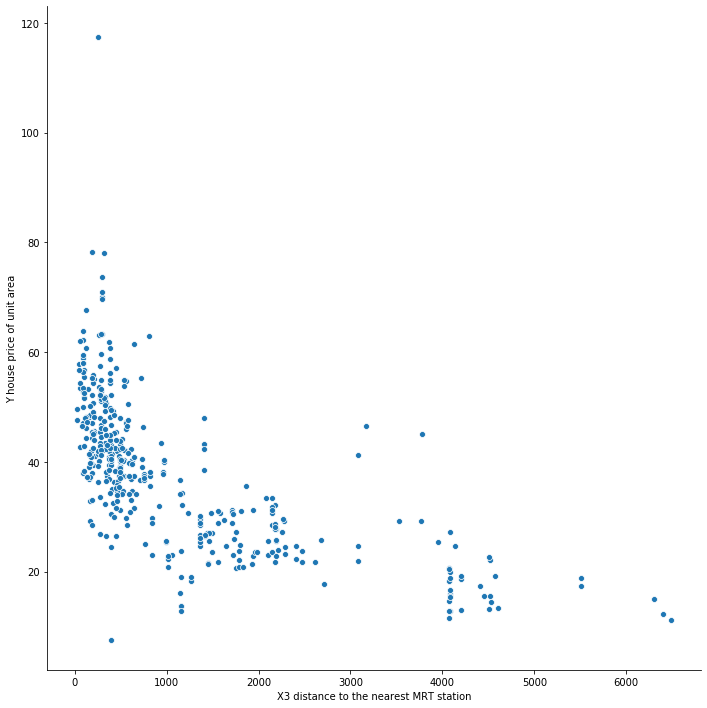

In [10]:
#Showing the scatter plot of "distance to the nearest MRT station" vs "house price".

sns.pairplot(Housing_data, x_vars = ['X3 distance to the nearest MRT station'], y_vars = ['Y house price of unit area'], height = 10, aspect = 1.0, kind = 'scatter')

In [11]:
#Declaring the independent variable.

X = Housing_data['X3 distance to the nearest MRT station']
X.head()

0     84.87882
1    306.59470
2    561.98450
3    561.98450
4    390.56840
Name: X3 distance to the nearest MRT station, dtype: float64

In [12]:
#Declaring the dependent variable.

Y = Housing_data['Y house price of unit area']
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [13]:
#Splitting the dataset into train and test.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, random_state = 100)

In [14]:
#Showing the train data.

print(X_train.shape)

(289,)


In [15]:
#Fixing the column issues in the train and test dataset as previously they showed only the number of rows.


import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [16]:
print(X_train.shape)

(289, 1)


In [17]:
#Fixing linear regression model.

from sklearn.linear_model import LinearRegression 

lr = LinearRegression()

lr.fit (X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#Printing the intercept and slope of the linear regression model.

print (lr.intercept_)
print(lr.coef_)

45.825776046478694
[-0.00714734]


In [19]:
#Declaring a prediction variable to test the model.

Y_pred = lr.predict(X_test)

In [20]:
#Showing prediction and test variable size.

print(Y_pred.shape)
print(Y_test.shape)

(125,)
(125,)


Text(0, 0.5, 'Unit price')

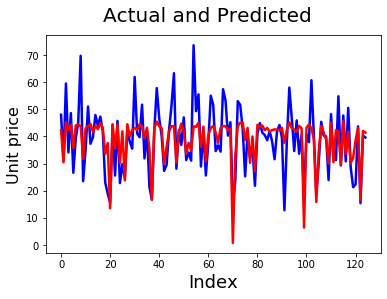

In [21]:
#Showing comparison between actual and predicted values.

import matplotlib.pyplot as plt
c = [i for i in range (0,125,1)]
fig=plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Unit price',fontsize=16)

Text(0, 0.5, 'Y_test-Y_pred')

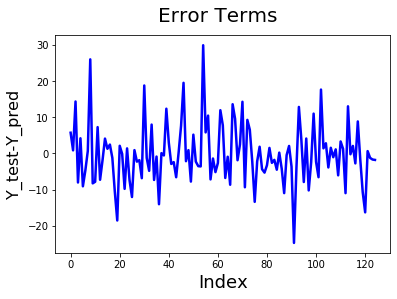

In [22]:
#Showing the residual plot.

c = [i for i in range (0,125,1)]
fig=plt.figure()
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Y_test-Y_pred',fontsize=16)

In [23]:
#Calculating mean squared error.

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (Y_test, Y_pred)

In [24]:
#Calculating the R-squared value.

r_squared=r2_score (Y_test, Y_pred)

In [25]:
print('Mean_Squared_Error :', mse)
print('r_squared_value :',r_squared)

Mean_Squared_Error : 68.6178057851028
r_squared_value : 0.5104359968219091


Text(0, 0.5, 'Predicted Y')

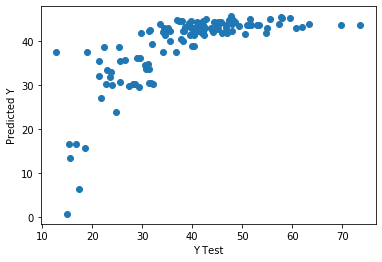

In [26]:
#Showing scatter plot of actual and predicted values.

import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [27]:
# The Simple Linear Regression exercise has an R-squared value of 0.51 and Mean Squared Error of 68.61, which indicate that the replationship between
# the two variables do not have a very strong Linear relationship. That is why the actual and prdicted house unit price differed so
# much from each other. A non-linear regression model could be tried in this case to come up with a better model.